Machine Learning Linear Regression - AirBnB Singapore
Bryan Leonardo          2201745004
Rio Nagano              2201767232
Ronaldo Kenny Chandra   2201763234

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score as r2s, mean_squared_error as mse, mean_absolute_error as mae

      latitude  longitude  price  minimum_nights  number_of_reviews  \
0      1.44255  103.79580     83             180                  1   
1      1.33235  103.78521     81              90                 18   
2      1.44246  103.79667     69               6                 20   
3      1.34541  103.95712    206               1                 14   
4      1.34567  103.95963     94               1                 22   
...        ...        ...    ...             ...                ...   
7715   1.31410  103.90317    699               3                  6   
7728   1.34063  103.88219     60               1                  1   
7752   1.30677  103.76224     56               1                  1   
7766   1.30074  103.84742    237               7                  1   
7767   1.39324  103.89002     60               1                  1   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.01                               2               3

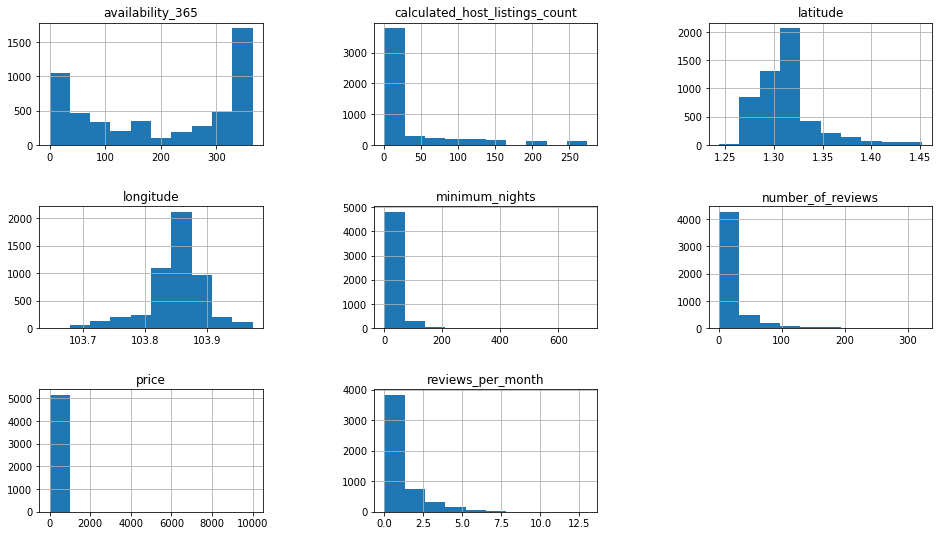

In [160]:
initData = pd.read_csv('listings.csv', delimiter = ",")

initData = initData.dropna()
# drop null values for accurate results

# print(initData.isna().values.any())
# verify if there's any null value

listingsData = initData[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
# select certain column

print(listingsData)
listingsData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,10]
plt.show()

Scatter Visualisation for Price and Reviews per Month

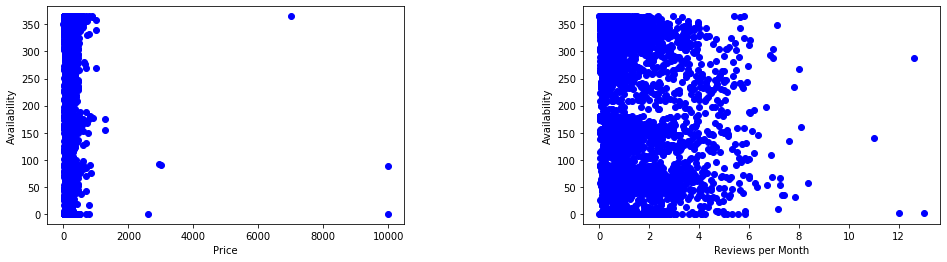

In [161]:
plt.subplot(221)
# plt.subplot(341)
plt.scatter(listingsData["price"], listingsData["availability_365"], color="blue")
plt.xlabel("Price")
plt.ylabel("Availability")

plt.subplot(222)
# plt.subplot(342)
plt.scatter(listingsData["reviews_per_month"], listingsData["availability_365"], color="blue")
plt.xlabel("Reviews per Month")
plt.ylabel("Availability")

# plt.subplot(343)
# plt.scatter(listingsData["latitude"], listingsData["availability_365"], color="blue")
# plt.xlabel("latitude")
# plt.ylabel("Availability")

# plt.subplot(344)
# plt.scatter(listingsData["longitude"], listingsData["availability_365"], color="blue")
# plt.xlabel("longitude")
# plt.ylabel("Availability")

# plt.subplot(345)
# plt.scatter(listingsData["minimum_nights"], listingsData["availability_365"], color="blue")
# plt.xlabel("minimum_nights")
# plt.ylabel("Availability")

# plt.subplot(346)
# plt.scatter(listingsData["number_of_reviews"], listingsData["availability_365"], color="blue")
# plt.xlabel("number_of_reviews")
# plt.ylabel("Availability")

# plt.subplot(347)
# plt.scatter(listingsData["calculated_host_listings_count"], listingsData["availability_365"], color="blue")
# plt.xlabel("calculated_host_listings_count")
# plt.ylabel("Availability")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

###

Regression - Price of Room

In [162]:
train, test = train_test_split(listingsData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["price"]], train[["availability_365"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.00474274]]
Intercept:  [200.65117883]


Price of Room Regression Visualisation

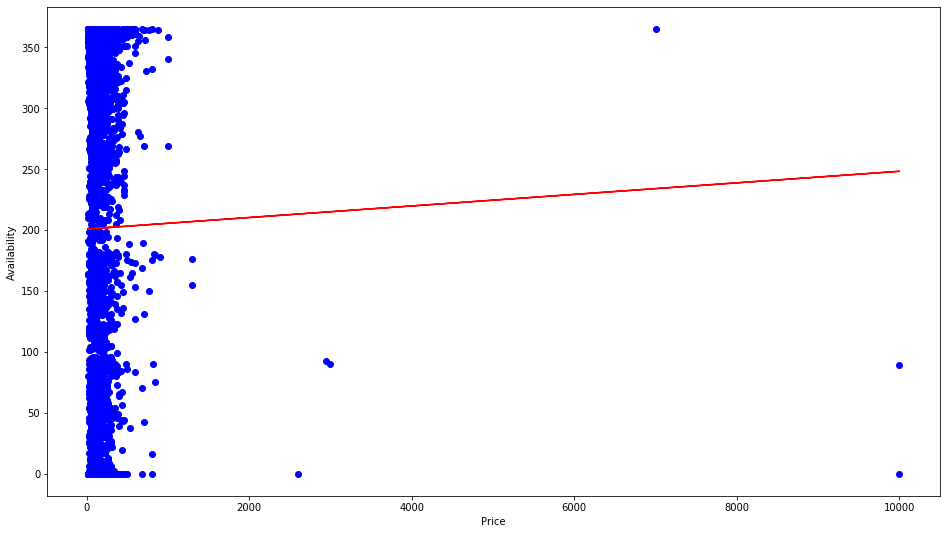

In [163]:
plt.scatter(train["price"], train["availability_365"],  color='blue')
plt.plot(train[["price"]], regression.coef_ * train[["price"]] + regression.intercept_, '-r')
plt.xlabel("Price")
plt.ylabel("Availability")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Seaborn Package Visualisation for Price of Room

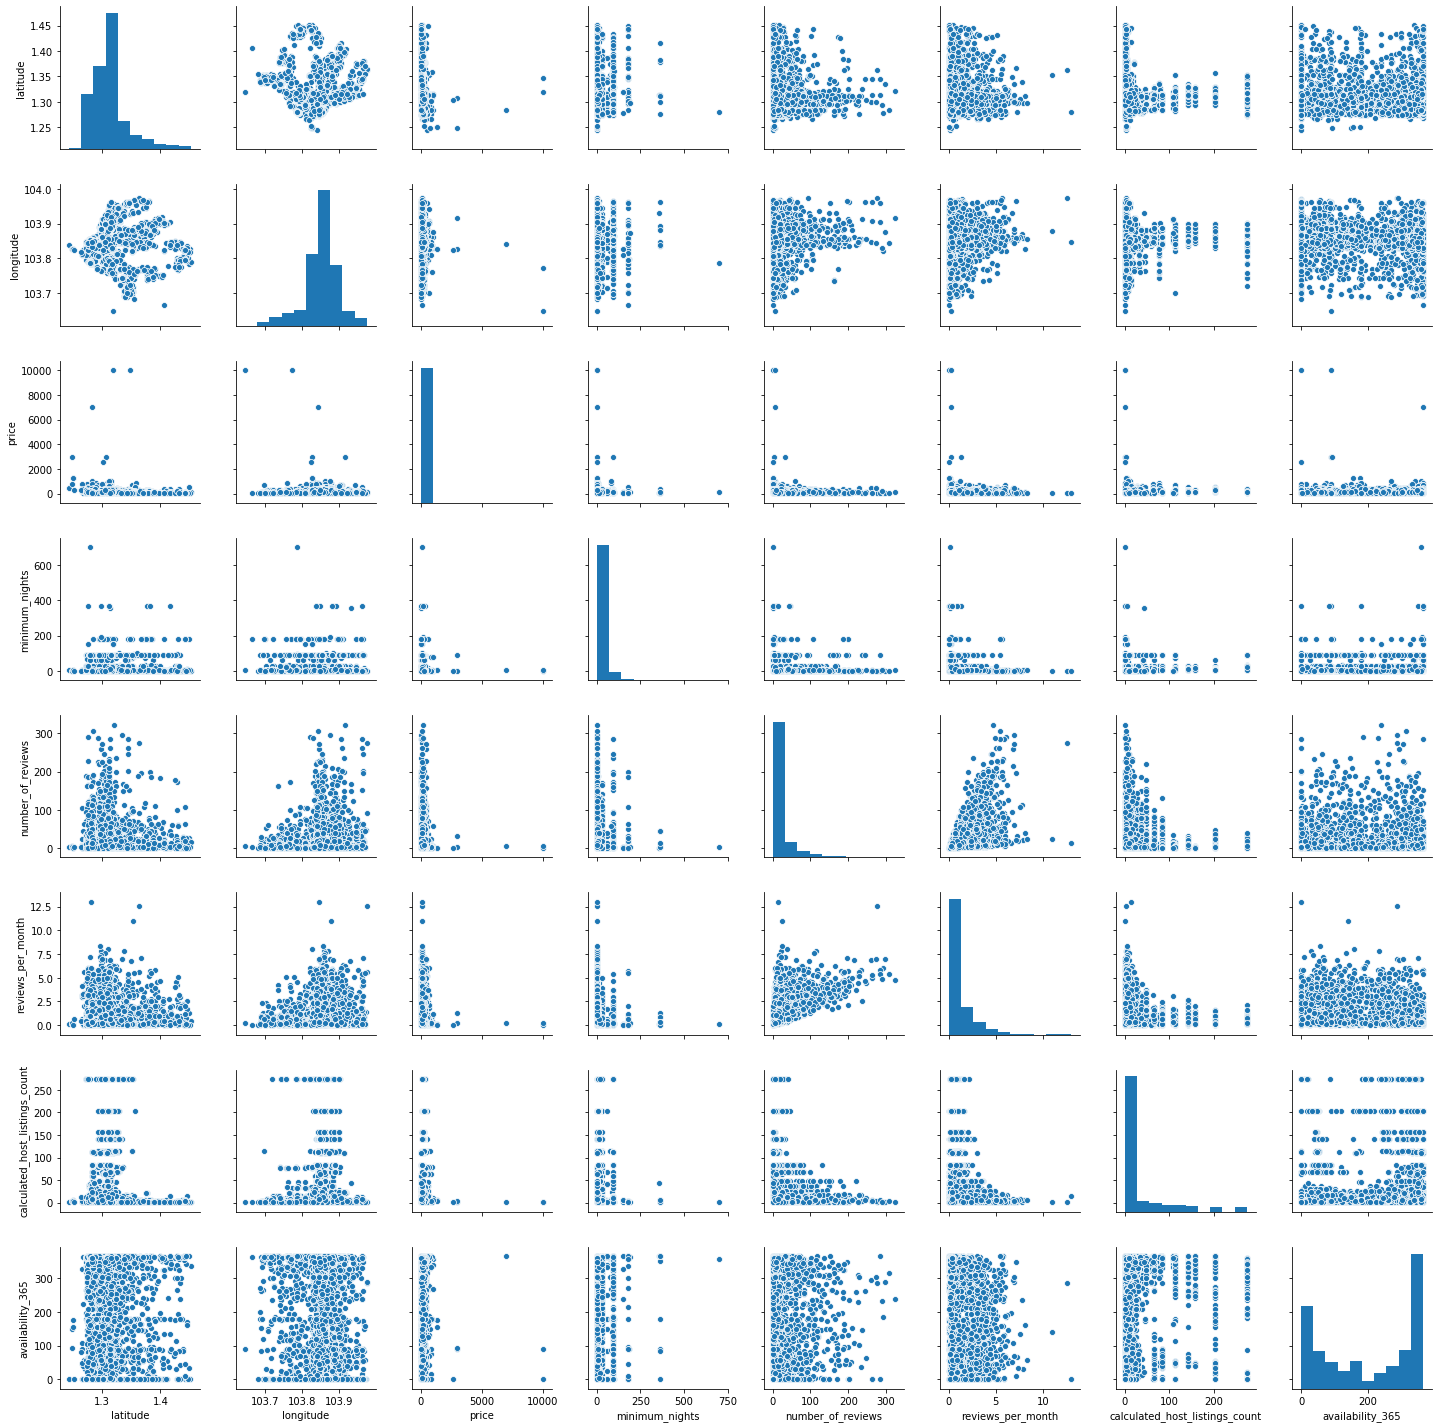

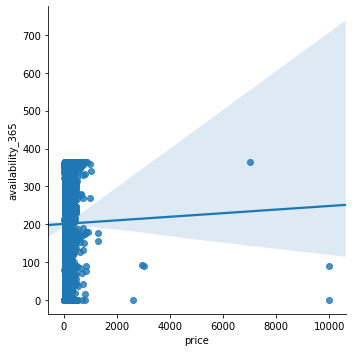

In [164]:
sb.pairplot(train)
sb.lmplot("price", "availability_365", data = train)
plt.show()

Predict new data & evaluate the model

In [165]:
prediction = regression.predict(test[["price"]])
for i in range(len(test)):
  print("Test value:", test[["price"]].values[i], " Prediction:", prediction[i])

print("\nMean Absolute Error : ", mae(test[["availability_365"]], prediction))
print("Mean Squared Error : ", mse(test[["availability_365"]], prediction))
print("R2 Score : ", r2s(test[["availability_365"]], prediction))


Test value: [104]  Prediction: [201.14442336]
Test value: [90]  Prediction: [201.07802506]
Test value: [49]  Prediction: [200.88357289]
Test value: [85]  Prediction: [201.05431138]
Test value: [169]  Prediction: [201.45270119]
Test value: [150]  Prediction: [201.36258921]
Test value: [24]  Prediction: [200.76500449]
Test value: [99]  Prediction: [201.12070968]
Test value: [31]  Prediction: [200.79820364]
Test value: [83]  Prediction: [201.04482591]
Test value: [587]  Prediction: [203.43516479]
Test value: [128]  Prediction: [201.25824902]
Test value: [35]  Prediction: [200.81717459]
Test value: [368]  Prediction: [202.39650563]
Test value: [60]  Prediction: [200.93574298]
Test value: [100]  Prediction: [201.12545242]
Test value: [108]  Prediction: [201.1633943]
Test value: [100]  Prediction: [201.12545242]
Test value: [81]  Prediction: [201.03534044]
Test value: [156]  Prediction: [201.39104563]
Test value: [108]  Prediction: [201.1633943]
Test value: [78]  Prediction: [201.02111223]
T

Test value: [94]  Prediction: [201.096996]
Test value: [50]  Prediction: [200.88831562]
Test value: [31]  Prediction: [200.79820364]
Test value: [35]  Prediction: [200.81717459]
Test value: [199]  Prediction: [201.59498327]
Test value: [325]  Prediction: [202.19256799]
Test value: [54]  Prediction: [200.90728657]
Test value: [118]  Prediction: [201.21082166]
Test value: [150]  Prediction: [201.36258921]
Test value: [169]  Prediction: [201.45270119]
Test value: [318]  Prediction: [202.15936884]
Test value: [49]  Prediction: [200.88357289]
Test value: [43]  Prediction: [200.85511647]
Test value: [178]  Prediction: [201.49538582]
Test value: [350]  Prediction: [202.31113639]
Test value: [119]  Prediction: [201.2155644]
Test value: [58]  Prediction: [200.92625751]
Test value: [56]  Prediction: [200.91677204]
Test value: [169]  Prediction: [201.45270119]
Test value: [60]  Prediction: [200.93574298]
Test value: [415]  Prediction: [202.61941422]
Test value: [189]  Prediction: [201.54755591]
T

Test value: [381]  Prediction: [202.4581612]
Test value: [144]  Prediction: [201.3341328]
Test value: [40]  Prediction: [200.84088826]
Test value: [149]  Prediction: [201.35784647]
Test value: [187]  Prediction: [201.53807044]
Test value: [94]  Prediction: [201.096996]
Test value: [50]  Prediction: [200.88831562]
Test value: [169]  Prediction: [201.45270119]
Test value: [87]  Prediction: [201.06379685]
Test value: [300]  Prediction: [202.07399959]
Test value: [135]  Prediction: [201.29144817]
Test value: [85]  Prediction: [201.05431138]
Test value: [137]  Prediction: [201.30093364]
Test value: [60]  Prediction: [200.93574298]
Test value: [112]  Prediction: [201.18236525]
Test value: [60]  Prediction: [200.93574298]
Test value: [40]  Prediction: [200.84088826]
Test value: [119]  Prediction: [201.2155644]
Test value: [44]  Prediction: [200.85985921]
Test value: [154]  Prediction: [201.38156015]
Test value: [25]  Prediction: [200.76974723]
Test value: [56]  Prediction: [200.91677204]
Test

Test value: [287]  Prediction: [202.01234403]
Test value: [108]  Prediction: [201.1633943]
Test value: [500]  Prediction: [203.02254677]
Test value: [85]  Prediction: [201.05431138]
Test value: [56]  Prediction: [200.91677204]
Test value: [131]  Prediction: [201.27247723]
Test value: [165]  Prediction: [201.43373025]
Test value: [181]  Prediction: [201.50961402]
Test value: [93]  Prediction: [201.09225327]
Test value: [119]  Prediction: [201.2155644]
Test value: [72]  Prediction: [200.99265581]
Test value: [125]  Prediction: [201.24402081]
Test value: [50]  Prediction: [200.88831562]
Test value: [25]  Prediction: [200.76974723]
Test value: [281]  Prediction: [201.98388761]
Test value: [139]  Prediction: [201.31041912]
Test value: [85]  Prediction: [201.05431138]
Test value: [44]  Prediction: [200.85985921]
Test value: [131]  Prediction: [201.27247723]
Test value: [78]  Prediction: [201.02111223]
Test value: [93]  Prediction: [201.09225327]
Test value: [68]  Prediction: [200.97368487]
T

Test value: [181]  Prediction: [201.50961402]
Test value: [160]  Prediction: [201.41001657]
Test value: [76]  Prediction: [201.01162676]
Test value: [281]  Prediction: [201.98388761]
Test value: [225]  Prediction: [201.7182944]
Test value: [290]  Prediction: [202.02657223]
Test value: [199]  Prediction: [201.59498327]
Test value: [581]  Prediction: [203.40670837]
Test value: [360]  Prediction: [202.35856374]
Test value: [260]  Prediction: [201.88429016]
Test value: [40]  Prediction: [200.84088826]
Test value: [117]  Prediction: [201.20607893]
Test value: [121]  Prediction: [201.22504987]
Test value: [69]  Prediction: [200.9784276]
Test value: [360]  Prediction: [202.35856374]
Test value: [81]  Prediction: [201.03534044]
Test value: [49]  Prediction: [200.88357289]
Test value: [410]  Prediction: [202.59570054]
Test value: [50]  Prediction: [200.88831562]
Test value: [87]  Prediction: [201.06379685]
Test value: [60]  Prediction: [200.93574298]
Test value: [149]  Prediction: [201.35784647

Test value: [181]  Prediction: [201.50961402]
Test value: [90]  Prediction: [201.07802506]
Test value: [256]  Prediction: [201.86531921]
Test value: [106]  Prediction: [201.15390883]
Test value: [31]  Prediction: [200.79820364]
Test value: [65]  Prediction: [200.95945666]
Test value: [65]  Prediction: [200.95945666]
Test value: [60]  Prediction: [200.93574298]
Test value: [178]  Prediction: [201.49538582]
Test value: [100]  Prediction: [201.12545242]
Test value: [90]  Prediction: [201.07802506]
Test value: [208]  Prediction: [201.63766789]
Test value: [99]  Prediction: [201.12070968]
Test value: [110]  Prediction: [201.17287978]
Test value: [110]  Prediction: [201.17287978]
Test value: [250]  Prediction: [201.8368628]
Test value: [168]  Prediction: [201.44795846]
Test value: [37]  Prediction: [200.82666006]
Test value: [399]  Prediction: [202.54353044]
Test value: [64]  Prediction: [200.95471393]
Test value: [168]  Prediction: [201.44795846]
Test value: [0]  Prediction: [200.65117883]


###

Regression - Reviews per Month

In [166]:
train, test = train_test_split(listingsData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["reviews_per_month"]], train[["availability_365"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[-10.99767741]]
Intercept:  [211.7497298]


Price of Room Regression Visualisation

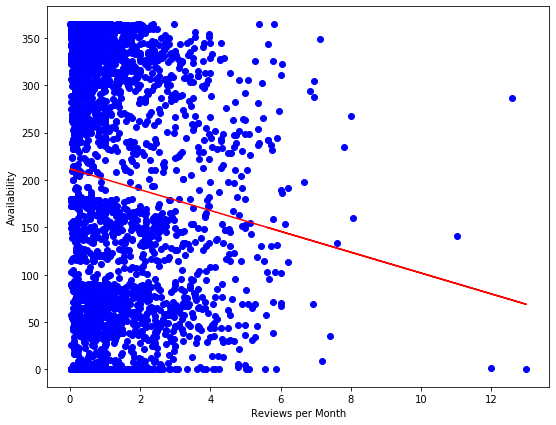

In [167]:
plt.scatter(train["reviews_per_month"], train["availability_365"],  color='blue')
plt.plot(train[["reviews_per_month"]], regression.coef_ * train[["reviews_per_month"]] + regression.intercept_, '-r')
plt.xlabel("Reviews per Month")
plt.ylabel("Availability")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Seaborn Package Visualisation for Reviews per Month

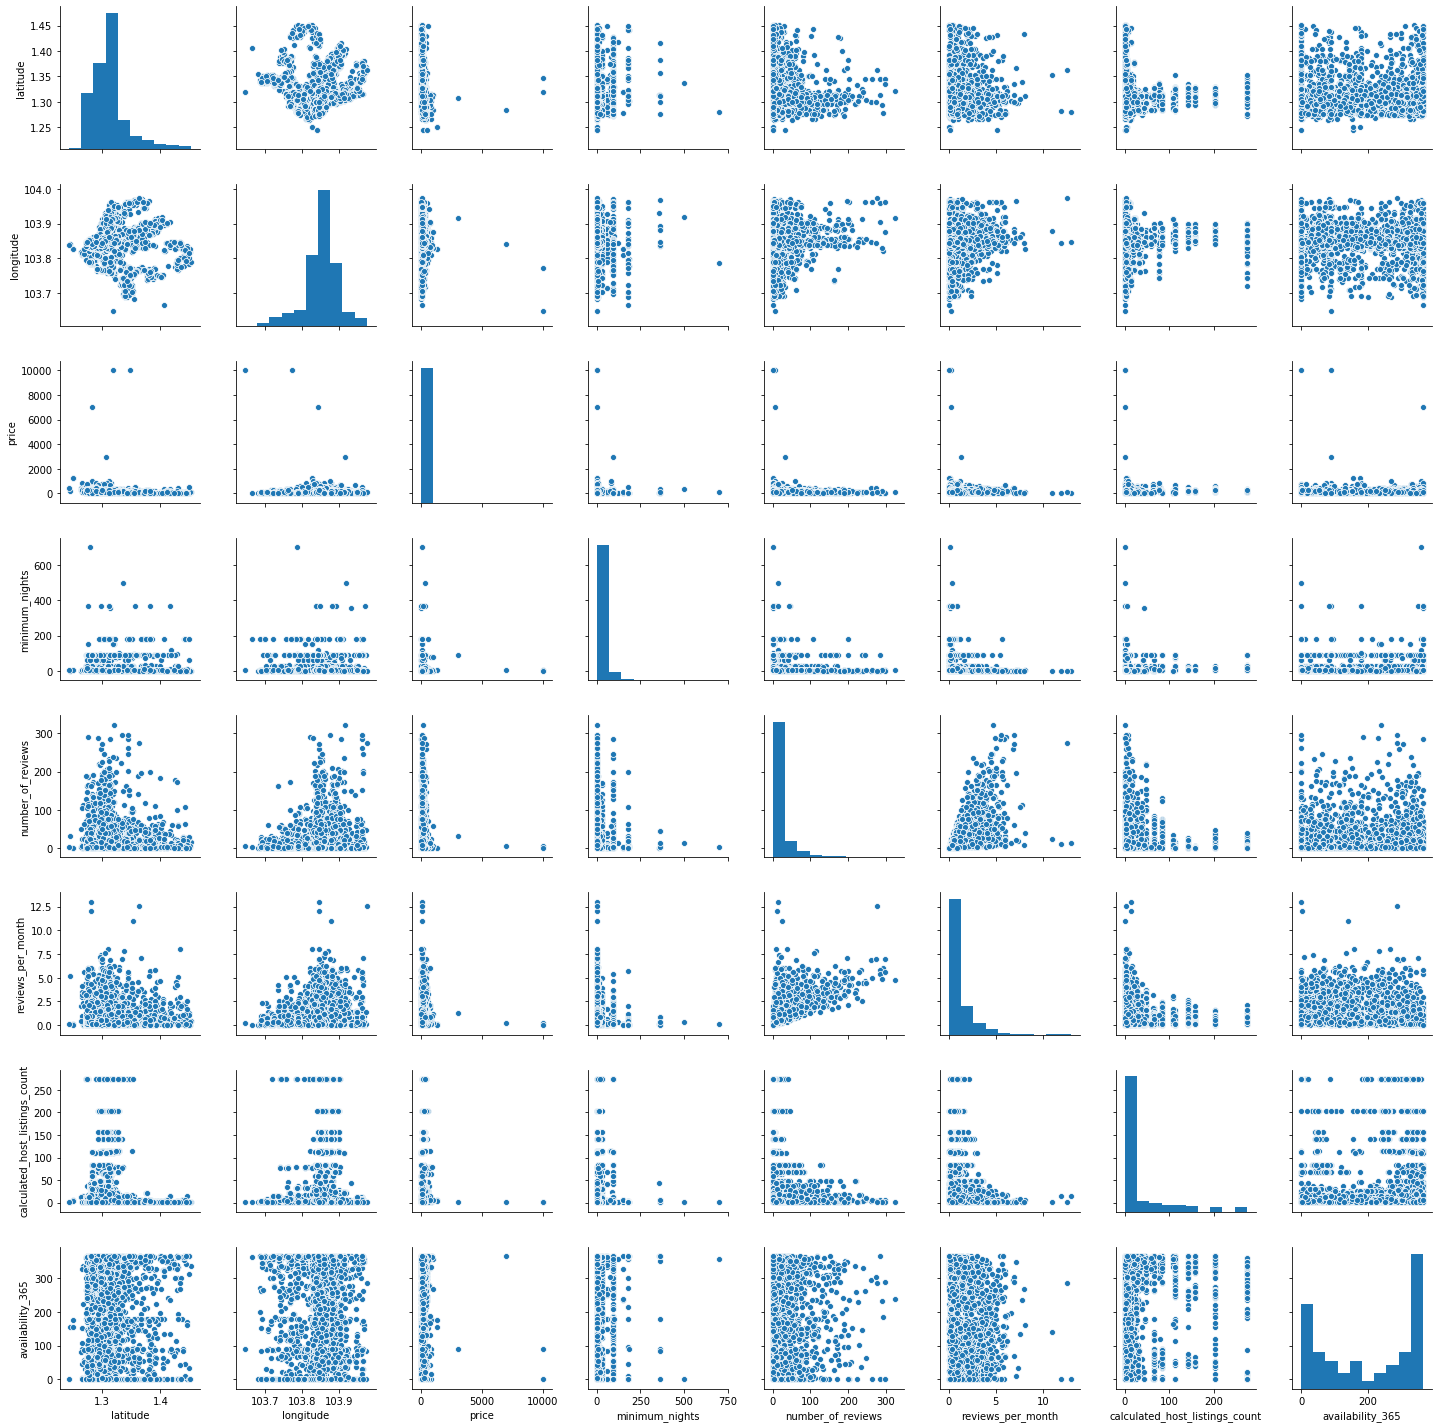

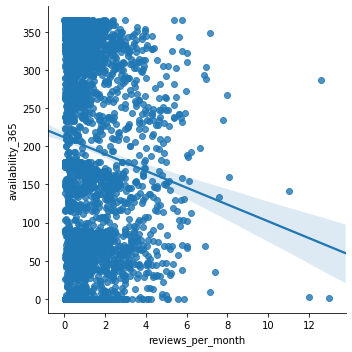

In [168]:
sb.pairplot(train)
sb.lmplot("reviews_per_month", "availability_365", data = train)
plt.show()

Predict new data & evaluate the model

In [169]:
prediction = regression.predict(test[["reviews_per_month"]])
for i in range(len(test)):
  print("Test value:", test[["reviews_per_month"]].values[i], " Prediction:", prediction[i])

print("\nMean Absolute Error : ", mae(test[["availability_365"]], prediction))
print("Mean Squared Error : ", mse(test[["availability_365"]], prediction))
print("R2 Score : ", r2s(test[["availability_365"]], prediction))


Test value: [0.61]  Prediction: [205.04114658]
Test value: [2.47]  Prediction: [184.5854666]
Test value: [3.06]  Prediction: [178.09683693]
Test value: [0.1]  Prediction: [210.64996205]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.2]  Prediction: [209.55019431]
Test value: [0.44]  Prediction: [206.91075174]
Test value: [0.33]  Prediction: [208.12049625]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.07]  Prediction: [210.97989238]
Test value: [0.03]  Prediction: [211.41979947]
Test value: [0.05]  Prediction: [211.19984592]
Test value: [0.48]  Prediction: [206.47084464]
Test value: [0.05]  Prediction: [211.19984592]
Test value: [0.37]  Prediction: [207.68058915]
Test value: [4.1]  Prediction: [166.65925242]
Test value: [1.17]  Prediction: [198.88244723]
Test value: [1.2]  Prediction: [198.55251691]
Test value: [1.45]  Prediction: [195.80309755]
Test value: [0.67]  Prediction: [204.38128593]
Test value: [0.77]  Prediction: [203.28151819]
Test value: [0.17]  Pr

Test value: [0.79]  Prediction: [203.06156464]
Test value: [0.15]  Prediction: [210.10007818]
Test value: [0.05]  Prediction: [211.19984592]
Test value: [0.62]  Prediction: [204.9311698]
Test value: [0.08]  Prediction: [210.8699156]
Test value: [0.6]  Prediction: [205.15112335]
Test value: [1.95]  Prediction: [190.30425885]
Test value: [0.46]  Prediction: [206.69079819]
Test value: [0.1]  Prediction: [210.64996205]
Test value: [0.12]  Prediction: [210.43000851]
Test value: [0.73]  Prediction: [203.72142529]
Test value: [8.37]  Prediction: [119.69916989]
Test value: [0.06]  Prediction: [211.08986915]
Test value: [0.25]  Prediction: [209.00031044]
Test value: [3.03]  Prediction: [178.42676725]
Test value: [0.29]  Prediction: [208.56040335]
Test value: [0.03]  Prediction: [211.41979947]
Test value: [3.72]  Prediction: [170.83836984]
Test value: [0.06]  Prediction: [211.08986915]
Test value: [0.02]  Prediction: [211.52977625]
Test value: [0.67]  Prediction: [204.38128593]
Test value: [0.54

Test value: [0.31]  Prediction: [208.3404498]
Test value: [4.91]  Prediction: [157.75113372]
Test value: [0.33]  Prediction: [208.12049625]
Test value: [0.63]  Prediction: [204.82119303]
Test value: [1.7]  Prediction: [193.0536782]
Test value: [4.08]  Prediction: [166.87920597]
Test value: [2.24]  Prediction: [187.1149324]
Test value: [2.75]  Prediction: [181.50611692]
Test value: [2.94]  Prediction: [179.41655821]
Test value: [0.23]  Prediction: [209.22026399]
Test value: [0.15]  Prediction: [210.10007818]
Test value: [0.19]  Prediction: [209.66017109]
Test value: [2.5]  Prediction: [184.25553627]
Test value: [2.48]  Prediction: [184.47548982]
Test value: [0.05]  Prediction: [211.19984592]
Test value: [0.04]  Prediction: [211.3098227]
Test value: [0.24]  Prediction: [209.11028722]
Test value: [0.06]  Prediction: [211.08986915]
Test value: [1.13]  Prediction: [199.32235432]
Test value: [1.82]  Prediction: [191.73395691]
Test value: [0.32]  Prediction: [208.23047302]
Test value: [0.07] 

Test value: [0.08]  Prediction: [210.8699156]
Test value: [0.96]  Prediction: [201.19195948]
Test value: [0.14]  Prediction: [210.21005496]
Test value: [1.83]  Prediction: [191.62398014]
Test value: [1.31]  Prediction: [197.34277239]
Test value: [0.22]  Prediction: [209.33024077]
Test value: [0.45]  Prediction: [206.80077496]
Test value: [1.01]  Prediction: [200.64207561]
Test value: [0.24]  Prediction: [209.11028722]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.75]  Prediction: [203.50147174]
Test value: [0.66]  Prediction: [204.49126271]
Test value: [2.94]  Prediction: [179.41655821]
Test value: [0.09]  Prediction: [210.75993883]
Test value: [1.23]  Prediction: [198.22258658]
Test value: [0.13]  Prediction: [210.32003173]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.16]  Prediction: [209.99010141]
Test value: [0.42]  Prediction: [207.13070528]
Test value: [0.35]  Prediction: [207.9005427]
Test value: [0.29]  Prediction: [208.56040335]
Test value: [5.93] 

Test value: [2.07]  Prediction: [188.98453756]
Test value: [2.93]  Prediction: [179.52653499]
Test value: [1.27]  Prediction: [197.78267949]
Test value: [0.03]  Prediction: [211.41979947]
Test value: [0.25]  Prediction: [209.00031044]
Test value: [0.36]  Prediction: [207.79056593]
Test value: [0.71]  Prediction: [203.94137884]
Test value: [0.49]  Prediction: [206.36086787]
Test value: [0.34]  Prediction: [208.01051948]
Test value: [0.4]  Prediction: [207.35065883]
Test value: [0.23]  Prediction: [209.22026399]
Test value: [0.22]  Prediction: [209.33024077]
Test value: [0.51]  Prediction: [206.14091432]
Test value: [3.77]  Prediction: [170.28848597]
Test value: [0.18]  Prediction: [209.77014786]
Test value: [2.35]  Prediction: [185.90518789]
Test value: [2.34]  Prediction: [186.01516466]
Test value: [0.76]  Prediction: [203.39149496]
Test value: [5.47]  Prediction: [151.59243437]
Test value: [0.35]  Prediction: [207.9005427]
Test value: [2.06]  Prediction: [189.09451433]
Test value: [1.

Test value: [3.19]  Prediction: [176.66713886]
Test value: [5.16]  Prediction: [155.00171437]
Test value: [0.45]  Prediction: [206.80077496]
Test value: [0.12]  Prediction: [210.43000851]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.34]  Prediction: [208.01051948]
Test value: [0.09]  Prediction: [210.75993883]
Test value: [0.46]  Prediction: [206.69079819]
Test value: [0.92]  Prediction: [201.63186658]
Test value: [0.16]  Prediction: [209.99010141]
Test value: [0.02]  Prediction: [211.52977625]
Test value: [0.08]  Prediction: [210.8699156]
Test value: [0.07]  Prediction: [210.97989238]
Test value: [0.06]  Prediction: [211.08986915]
Test value: [0.06]  Prediction: [211.08986915]
Test value: [0.71]  Prediction: [203.94137884]
Test value: [0.05]  Prediction: [211.19984592]
Test value: [0.12]  Prediction: [210.43000851]
Test value: [0.9]  Prediction: [201.85182013]
Test value: [1.]  Prediction: [200.75205239]
Test value: [0.45]  Prediction: [206.80077496]
Test value: [0.15] 

###